In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf 
import datetime as dt



In [2]:
start='2010-01-01'
end='2022-03-30'
df = yf.download('SBIN.NS', start, end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+05:30,227.500000,230.000000,227.500000,229.119995,199.520050,11031470
2010-01-05 00:00:00+05:30,230.800003,231.000000,228.009995,229.205002,199.594101,11613740
2010-01-06 00:00:00+05:30,229.699997,231.500000,228.500000,230.580002,200.791428,14527930
2010-01-07 00:00:00+05:30,230.600006,231.000000,228.110001,229.289993,199.668060,8576510
2010-01-08 00:00:00+05:30,229.399994,230.389999,228.009995,228.604996,199.071579,10453820


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+05:30,227.500000,230.000000,227.500000,229.119995,199.520050,11031470
2010-01-05 00:00:00+05:30,230.800003,231.000000,228.009995,229.205002,199.594101,11613740
2010-01-06 00:00:00+05:30,229.699997,231.500000,228.500000,230.580002,200.791428,14527930
2010-01-07 00:00:00+05:30,230.600006,231.000000,228.110001,229.289993,199.668060,8576510
2010-01-08 00:00:00+05:30,229.399994,230.389999,228.009995,228.604996,199.071579,10453820
...,...,...,...,...,...,...
2022-03-23 00:00:00+05:30,498.500000,502.399994,489.200012,490.649994,483.110504,15800195
2022-03-24 00:00:00+05:30,485.000000,494.799988,483.500000,487.100006,479.615082,18174877
2022-03-25 00:00:00+05:30,491.750000,493.299988,486.600006,490.700012,483.159760,11541196


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04 00:00:00+05:30,227.500000,230.000000,227.500000,229.119995,199.520050,11031470
1,2010-01-05 00:00:00+05:30,230.800003,231.000000,228.009995,229.205002,199.594101,11613740
2,2010-01-06 00:00:00+05:30,229.699997,231.500000,228.500000,230.580002,200.791428,14527930
3,2010-01-07 00:00:00+05:30,230.600006,231.000000,228.110001,229.289993,199.668060,8576510
4,2010-01-08 00:00:00+05:30,229.399994,230.389999,228.009995,228.604996,199.071579,10453820


In [5]:
df = df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,227.500000,230.000000,227.500000,229.119995,199.520050,11031470
1,230.800003,231.000000,228.009995,229.205002,199.594101,11613740
2,229.699997,231.500000,228.500000,230.580002,200.791428,14527930
3,230.600006,231.000000,228.110001,229.289993,199.668060,8576510
4,229.399994,230.389999,228.009995,228.604996,199.071579,10453820


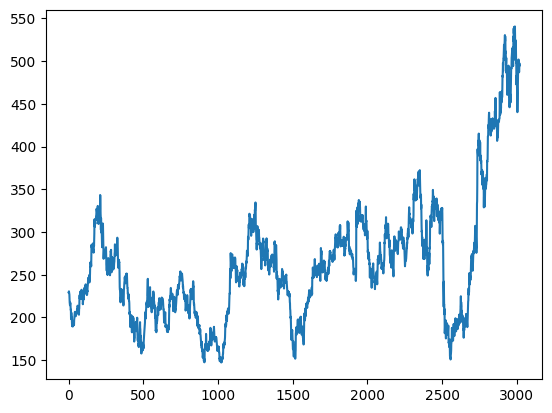

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    494.3405
3016    494.1980
3017    494.0835
3018    493.9015
3019    493.6345
Name: Close, Length: 3020, dtype: float64

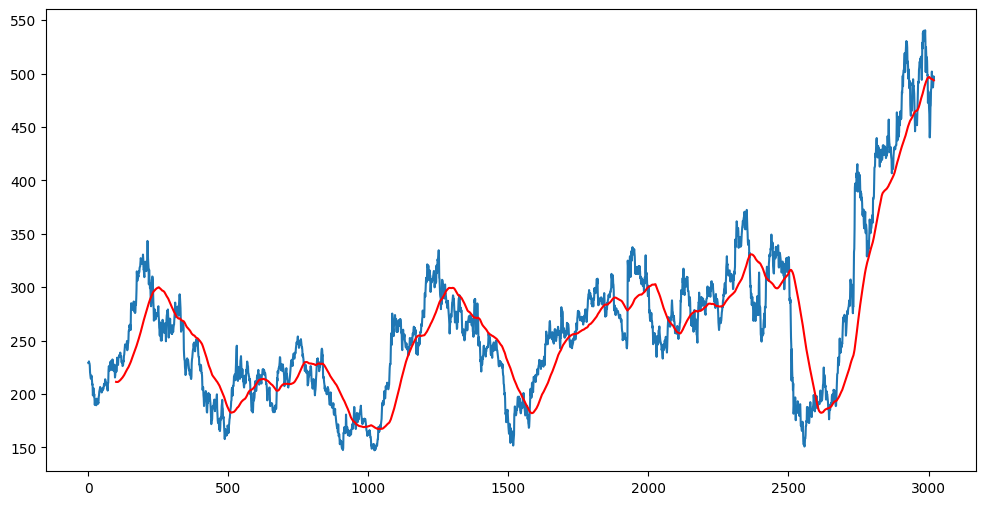

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
m200 = df.Close.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3015    466.997001
3016    467.264501
3017    467.556751
3018    467.908251
3019    468.276001
Name: Close, Length: 3020, dtype: float64

[]

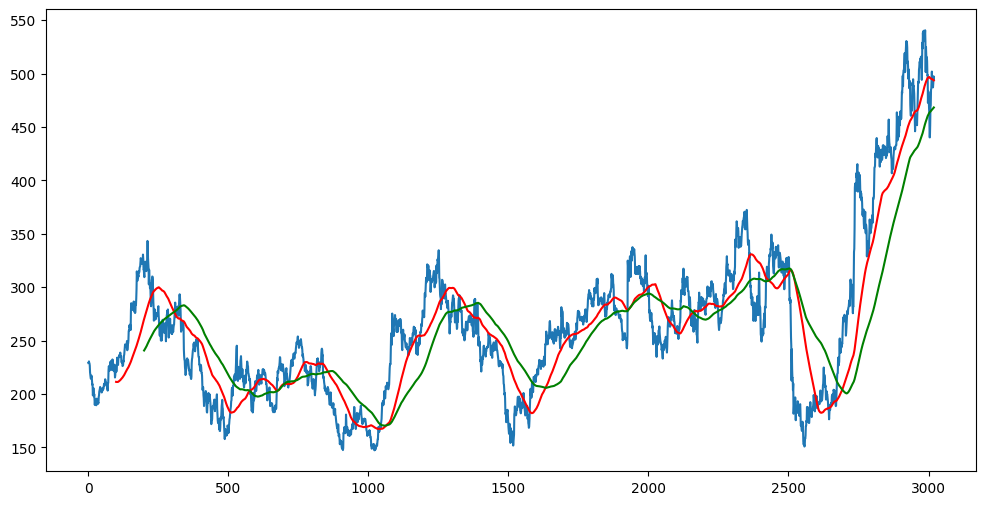

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',m200,'g')
plt.plot()

In [11]:
df.shape

(3020, 6)

In [12]:
# spliting data traning into testing
data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_traning.shape)
print(data_testing.shape)


(2114, 1)
(906, 1)


In [13]:
data_traning.head()

,Close
0,229.119995
1,229.205002
2,230.580002
3,229.289993
4,228.604996


In [14]:
data_testing.head()

,Close
2114,271.850006
2115,287.700012
2116,286.750000
2117,297.399994
2118,293.500000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.41717475],
       [0.4176085 ],
       [0.42462434],
       ...,
       [0.5823915 ],
       [0.60713833],
       [0.60968954]])

In [17]:
data_traning_array.shape

(2114, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100: i])
    y_train.append(data_traning_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2014, 100, 1)

In [20]:
#ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [22]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, 
input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=100, activation='relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=150, activation='relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units=200, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 150)          150600    
                                                                 
 dropout_2 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_3 (LSTM)               (None, 200)               2

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
63/63 [==============================] - 40s 492ms/step - loss: 0.0428
Epoch 2/20
63/63 [==============================] - 34s 533ms/step - loss: 0.0136
Epoch 3/20
63/63 [==============================] - 31s 487ms/step - loss: 0.0107
Epoch 4/20
63/63 [==============================] - 31s 485ms/step - loss: 0.0094
Epoch 5/20
63/63 [==============================] - 31s 486ms/step - loss: 0.0087
Epoch 6/20
63/63 [==============================] - 34s 543ms/step - loss: 0.0090
Epoch 7/20
63/63 [==============================] - 35s 558ms/step - loss: 0.0085
Epoch 8/20
63/63 [==============================] - 35s 553ms/step - loss: 0.0073
Epoch 9/20
63/63 [==============================] - 35s 561ms/step - loss: 0.0071
Epoch 10/20
63/63 [==============================] - 37s 594ms/step - loss: 0.0069
Epoch 11/20
63/63 [==============================] - 34s 542ms/step - loss: 0.0067
Epoch 12/20
63/63 [==============================] - 33s 516ms/step - loss: 0.0058
Epoch 13/20
6

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2114,271.850006
2115,287.700012
2116,286.750000
2117,297.399994
2118,293.500000


In [27]:
data_traning.tail(100)

,Close
2014,262.149994
2015,263.500000
2016,256.549988
2017,246.649994
2018,256.799988
...,...
2109,259.549988
2110,260.200012
2111,261.500000
2112,266.350006


In [28]:
past_100_days = data_traning.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_26428\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [30]:
final_df.head()

,Close
0,262.149994
1,263.500000
2,256.549988
3,246.649994
4,256.799988


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28560429],
       [0.28906851],
       [0.27123425],
       ...,
       [0.87208114],
       [0.88953043],
       [0.88311524]])

In [32]:
input_data.shape

(1006, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [35]:
# Making Prediction 

y_predicted = model.predict(x_test)

29/29 [==============================] - 6s 146ms/step


In [36]:
y_predicted.shape

(906, 1)

In [37]:
y_test

array([0.31049527, 0.3511676 , 0.34872979, 0.37605849, 0.36605081,
       0.37015655, 0.36707722, 0.38080575, 0.40454196, 0.39312289,
       0.40505521, 0.42738002, 0.39414938, 0.36771874, 0.3696433 ,
       0.36399798, 0.38811908, 0.40236078, 0.40069284, 0.38901723,
       0.38388507, 0.40325892, 0.39645883, 0.40762128, 0.40479858,
       0.40736466, 0.39902491, 0.37349242, 0.37387731, 0.37362077,
       0.36130355, 0.34385426, 0.33808059, 0.34500895, 0.35873748,
       0.34500895, 0.31549907, 0.30959712, 0.30728767, 0.29124969,
       0.30805746, 0.28996665, 0.29381577, 0.29420067, 0.31562742,
       0.31011037, 0.30921223, 0.27585323, 0.29484218, 0.2876572 ,
       0.32794456, 0.28560429, 0.28971003, 0.28829872, 0.3065178 ,
       0.28303822, 0.28290994, 0.28098539, 0.2689248 , 0.26905311,
       0.25327175, 0.24955095, 0.30035923, 0.31383114, 0.33500127,
       0.34654861, 0.3451373 , 0.36977165, 0.34796   , 0.34821655,
       0.33974852, 0.32614835, 0.3264049 , 0.34064667, 0.34526

In [38]:
y_predicted

array([[0.28048673],
       [0.28759867],
       [0.2995547 ],
       [0.31504196],
       [0.33310172],
       [0.3507241 ],
       [0.36552513],
       [0.37563288],
       [0.38182065],
       [0.38717568],
       [0.3919196 ],
       [0.39655662],
       [0.40264368],
       [0.4074096 ],
       [0.4062733 ],
       [0.39917588],
       [0.3879605 ],
       [0.37825972],
       [0.37460846],
       [0.37719896],
       [0.38269493],
       [0.38765615],
       [0.39227647],
       [0.39610618],
       [0.39986753],
       [0.4033717 ],
       [0.40642947],
       [0.40797997],
       [0.4053337 ],
       [0.398638  ],
       [0.3897925 ],
       [0.3799432 ],
       [0.36897582],
       [0.35747612],
       [0.34755453],
       [0.3420784 ],
       [0.3403732 ],
       [0.33811802],
       [0.3330406 ],
       [0.3255113 ],
       [0.31590652],
       [0.307046  ],
       [0.29937184],
       [0.29346392],
       [0.2896467 ],
       [0.28973508],
       [0.29336372],
       [0.298

In [39]:
scaler.scale_

array([0.00256608])

In [40]:
scale_factor = 1/0.00256608
y_predicted = y_predicted*scale_factor
y_test  = y_test * scale_factor

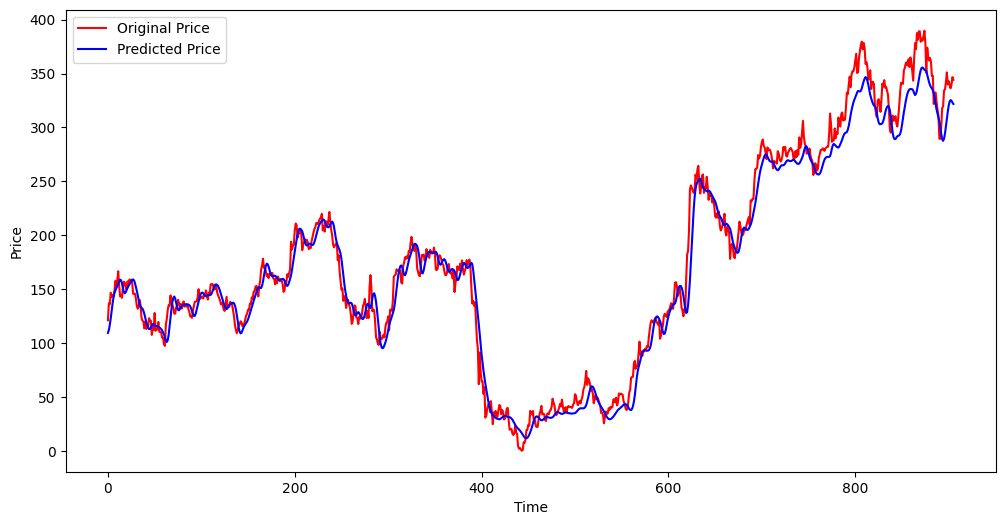

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'r', label= 'Original Price')
plt.plot(y_predicted, 'b' , label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()